# Exploring and Benchmarking XGBoost Against Other Machine Learning Models

---

## Part I: Understanding XGBoost

### Introduction
- Briefly introduce machine learning and the role of ensemble learning

### Background on Boosting
- Explain the concept of boosting in machine learning. Refresh the concept of boosing with an image depiction?
    - Boosting is an ensemble method that trains sequential models on the errors, or residuals, of previous models, thus creating a strong learner via iteration on many weak learners. **ISL**  **& BOOK 92**

- Historical evolution leading to gradient boosting.
    - Boositng and other ensemble methods were popularized due standard decision trees overfitting data. Boosting allowed for a more generalizable model with "consistency and power". **BOOK 110**

### XGBoost Overview
- Detailed explanation of XGBoost and its core algorithm.
    - XGBoost, which stands for "Extreme Gradient Boosting", is an open source software who's algorithm uses gradient boosting to . Averages or the majority class are considered when outputing a result. **Read the docs: tutorials**

- Advantages of XGBoost over other boosting methods.
    - XGBoost is extremely fast, memory efficient, and can perform advance model operations **Read the docs: faq** **& Book 57**
    - Not only is XGBoost fast, but it can provide better accuracy than other gradient boosting models. Speed can be attributed to it's ability to handle missing values, it storing sparce matrices of data, computing in parallel with blocks, being cache-aware. **Book 129**  
        - XGBoost models can learn even with missing values. 
        - from original XGBoost papaer: A Scalable Tree Boosting System, the sparsity-aware split-finding algorithm performed 50 times faster than the standard approach on the All-State-10K dataset.**Book 112**
        - Parallel computing occurs when multiple computational units are working together on the same problem at the same time. XGBoost sorts and compresses the data into blocks. These blocks may be distributed to multiple machines, or to external memory (out of core). Sorting the data is faster with blocks. The split-finding algorithm takes advantage of blocks and the search for quantiles is faster due to blocks. In each of these cases, XGBoost provides parallel computing to expedite the model-building process. **Book 112**
        - According to XGBoost: A Scalable Tree Boosting System, prefetching lengthens read/write dependency and reduces runtimes by approximately 50% for datasets with a large number of rows. **BOOK 112**
    - And accuracy can be attributed to XGBoost's built-in regularization. 
        - Regularization is the process of adding information to reduce variance and prevent overfitting. **BOOK 112**


### Key Concepts and Features of XGBoost
- Discuss tree boosting, regularized learning, and model complexity.
- Overview of handling missing data, parallel processing, and scalability.

### XGBoost Parameters
- List and explain crucial XGBoost hyperparameters.
    -  XGBoost is easy to use with scikit-learn since "all standard methods are available" and scikit-learn's functions like train_test_split, and GridSearchCV can be combined with XGBoost models. **BOOK 117**
    - Some hyperparameters are required to build a specific model. 
        - General parameters determine what booster we will be using. **Read the docs: parameter**
        - Booster parameters will depend on the general parameter chosen. **Read the docs: parameter**
        - Learning task parameters determine the "objective", or scoring metric, and the evaluation metric. **Read the docs: parameter**
    - These hyperparameters "are designed to improve upon accuracy and speed. **Book 130**

    - Hyperparameters of specific models are similar to scikit-learn's hyperparameters:

<img src="../images/XGBoost_hyperparameters.png" alt="Some of XGBoost's core hyperparameters" style="width: 500px;"/>


### Installation and Setup

Installation from XGBoost documentation:

##### **Conda**:
conda install -c conda-forge py-xgboost

##### **Pip**:
pip install xgboost

In [51]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# wine toy dataset
wine = datasets.load_wine()

df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],columns=
wine['feature_names'] + ['target'])

X = wine.data
y = wine.target
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [52]:
# building the model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(booster='gbtree')

In [53]:
# This takes about 11 minutes to run with L1 and L2 regularization
# about 40 seconds without them

# grid search to find the best parameters (using some parameters from above list)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [2, 5, 10],
    'min_child_weight': [1, 2, 4, 8, 16], # min_saples_leaf
    # 'lambda': [0, 0.1, 0.5, 1], # L2 regularazation
    # 'alpha': [0, 0.1, 0.5, 1], # L1 regularazation
}

grid_xgb = GridSearchCV(xgb, param_grid, scoring='accuracy', n_jobs=-1)

grid_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [2, 5, 10],
                         'min_child_weight': [1, 2, 4, 8, 16],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [54]:
grid_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 8,
 'n_estimators': 50}

In [55]:
grid_xgb.best_score_

0.9626780626780628

In [60]:
# accuracy on training data
xgb_best = grid_xgb.best_estimator_

y_pred_train = xgb_best.predict(X_train)

score = accuracy_score(y_pred_train, y_train)
print('Training Score: ' + str(score))


Training Score: 1.0


In [61]:
# accuracy on testing data
y_pred = xgb_best.predict(X_test)

score = accuracy_score(y_pred, y_test)
print('Testing Score: ' + str(score))


Testing Score: 0.9777777777777777


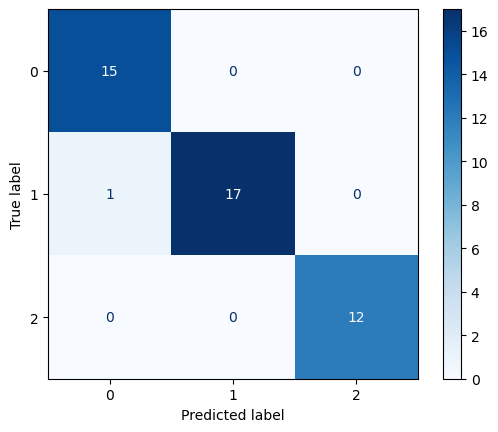

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')

### Interpretation of Results
- How to interpret model outputs, importance scores, and diagnostics.

---

## Part II: Performance Comparison of XGBoost

### Benchmarking Goals
- Define the objectives of the performance comparison.


### Selection of Competing Models
- Choose a set of models for comparison (e.g., Random Forest, SVM, Neural Networks).

### Dataset Description
- Introduce the dataset(s) used for the comparison.
- Include feature descriptions and any preprocessing steps.

### Performance Metrics
- Define the metrics for evaluating model performance (e.g., accuracy, F1 score, ROC-AUC).

### Cross-Validation Strategy
- Explain the cross-validation process to ensure fairness in comparison.

### Hyperparameter Tuning
- How each model's hyperparameters are tuned for optimal performance.

### Model Training and Evaluation
- Train the selected models on the dataset.
- Evaluate and compare their performance using the defined metrics.

### Result Analysis
- Present the comparison results in tables or graphs.
- Statistical tests, if applicable, to establish significant differences.

### Discussion
- Interpret the comparison findings.
- Discuss where XGBoost outperforms or underperforms.

### Conclusion
- Summarize key takeaways from the XGBoost exploration and model comparison.

---

## Appendices and Supporting Materials

- Code snippets, Jupyter Notebook links, or GitHub repository.
- Detailed tables and graphical representations of results.
- Additional notes on the computational environment, data access, etc.